In [1]:
#Question 1.i
#If the test were not available, is it more profitable for RadyCeutical to produce 1,000 kg, 850 kg, or are they the same?
def calculate_expected_profit():
    # Constants
    selling_price_per_kg = 10000  # $ per kg
    cost_per_kg = 8000  # $ per kg
    profit_per_kg = selling_price_per_kg - cost_per_kg

    # Probabilities
    prob_hot_market = 0.8
    prob_cold_market = 0.2

    # Expected profit for producing 1000 kg
    profit_hot_1000 = 1000 * profit_per_kg
    profit_cold_1000 = 850 * profit_per_kg
    expected_profit_1000 = prob_hot_market * profit_hot_1000 + prob_cold_market * profit_cold_1000

    # Expected profit for producing 850 kg (same in hot and cold market)
    expected_profit_850 = 850 * profit_per_kg

    return expected_profit_1000, expected_profit_850

# Calculate and compare the expected profits
expected_profit_1000, expected_profit_850 = calculate_expected_profit()
print(f"Expected Profit for producing 1000 kg: ${expected_profit_1000:,.2f}")
print(f"Expected Profit for producing 850 kg: ${expected_profit_850:,.2f}")

# Determine the more profitable option
if expected_profit_1000 > expected_profit_850:
    print("Producing 1000 kg is more profitable.")
elif expected_profit_1000 < expected_profit_850:
    print("Producing 850 kg is more profitable.")
else:
    print("Both options are equally profitable.")


Expected Profit for producing 1000 kg: $1,940,000.00
Expected Profit for producing 850 kg: $1,700,000.00
Producing 1000 kg is more profitable.


Expected Profit for producing 1000 kg without test: $1,940,000.00
Expected Profit for producing 850 kg without test: $1,700,000.00
Expected Profit with market test: $3,730,000.00
Conducting the market test is the best strategy.


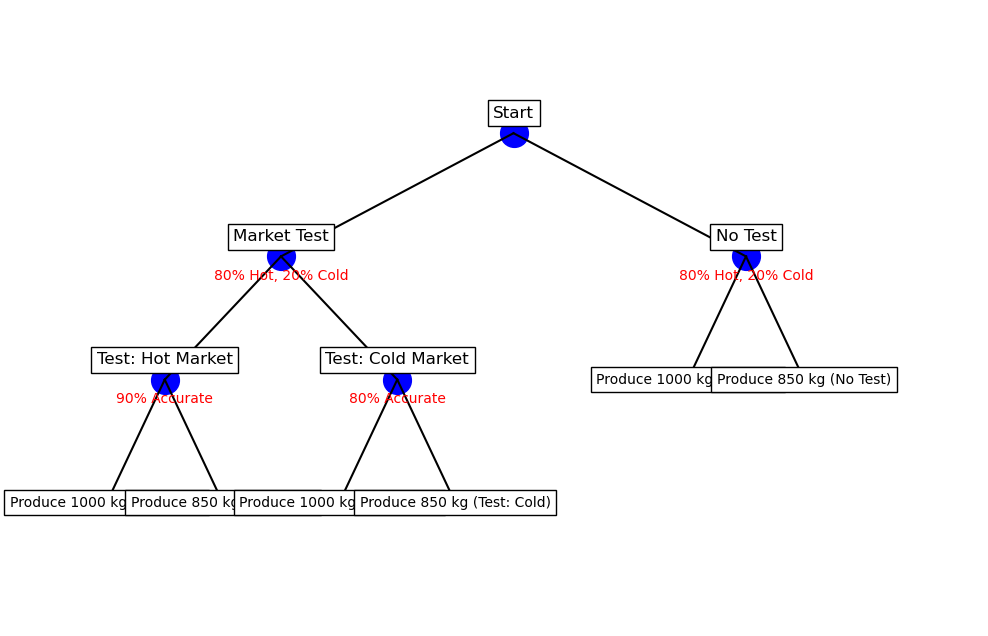

In [4]:
#Question 1.ii
# Create a complete decision tree that now includes whether to conduct a market test. 
def calculate_profit_with_test(prob_hot_market, prob_cold_market, prob_test_hot_given_hot, prob_test_cold_given_cold, profit_hot_1000, profit_cold_1000, profit_850):
    # Probabilities of test outcomes
    prob_test_hot = prob_hot_market * prob_test_hot_given_hot + prob_cold_market * (1 - prob_test_cold_given_cold)
    prob_test_cold = prob_cold_market * prob_test_cold_given_cold + prob_hot_market * (1 - prob_test_hot_given_hot)

    # Expected profits based on test outcomes
    profit_test_hot = (prob_test_hot_given_hot * profit_hot_1000 + (1 - prob_test_hot_given_hot) * profit_cold_1000) / prob_test_hot
    profit_test_cold = (prob_test_cold_given_cold * profit_850 + (1 - prob_test_cold_given_cold) * profit_hot_1000) / prob_test_cold

    # Overall expected profit with test
    expected_profit_with_test = prob_test_hot * profit_test_hot + prob_test_cold * profit_test_cold

    return expected_profit_with_test

def decision_tree_analysis():
    # Constants
    selling_price_per_kg = 10000  # $ per kg
    cost_per_kg = 8000  # $ per kg
    profit_per_kg = selling_price_per_kg - cost_per_kg

    # Probabilities
    prob_hot_market = 0.8
    prob_cold_market = 0.2
    prob_test_hot_given_hot = 0.9
    prob_test_cold_given_cold = 0.8

    # Profits
    profit_hot_1000 = 1000 * profit_per_kg
    profit_cold_1000 = 850 * profit_per_kg
    profit_850 = 850 * profit_per_kg

    # Expected profits without test
    expected_profit_1000, expected_profit_850 = calculate_expected_profit()

    # Expected profit with test
    expected_profit_with_test = calculate_profit_with_test(prob_hot_market, prob_cold_market, prob_test_hot_given_hot, prob_test_cold_given_cold, profit_hot_1000, profit_cold_1000, profit_850)

    return expected_profit_1000, expected_profit_850, expected_profit_with_test

# Calculate and compare the expected profits
expected_profit_1000, expected_profit_850, expected_profit_with_test = decision_tree_analysis()
print(f"Expected Profit for producing 1000 kg without test: ${expected_profit_1000:,.2f}")
print(f"Expected Profit for producing 850 kg without test: ${expected_profit_850:,.2f}")
print(f"Expected Profit with market test: ${expected_profit_with_test:,.2f}")

# Determine the best strategy
if expected_profit_with_test > max(expected_profit_1000, expected_profit_850):
    print("Conducting the market test is the best strategy.")
else:
    print("Not conducting the market test is the best strategy.")

#simplified decision tree with main decision points and outcomes that includes some of the probabilities and detailed calculations for each branch
import matplotlib.pyplot as plt

def draw_detailed_decision_tree():
    fig, ax = plt.subplots(figsize=(12, 8))

    # Decision Nodes
    decisions = {
        "Start": (0, 0),
        "Market Test": (-2, -1),
        "No Test": (2, -1),
        "Test: Hot Market": (-3, -2),
        "Test: Cold Market": (-1, -2),
    }

    # Leaf Nodes
    leaves = {
        "Produce 1000 kg (Test: Hot)": (-3.5, -3),
        "Produce 850 kg (Test: Hot)": (-2.5, -3),
        "Produce 1000 kg (Test: Cold)": (-1.5, -3),
        "Produce 850 kg (Test: Cold)": (-0.5, -3),
        "Produce 1000 kg (No Test)": (1.5, -2),
        "Produce 850 kg (No Test)": (2.5, -2),
    }

    # Probabilities and Outcomes
    probabilities = {
        "Market Test": "80% Hot, 20% Cold",
        "No Test": "80% Hot, 20% Cold",
        "Test: Hot Market": "90% Accurate",
        "Test: Cold Market": "80% Accurate",
    }

    # Draw Decision Nodes
    for key, (x, y) in decisions.items():
        ax.plot(x, y, 'o', markersize=20, color='blue')
        ax.text(x, y + 0.1, key, ha='center', va='bottom', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))
        if key in probabilities:
            ax.text(x, y - 0.1, probabilities[key], ha='center', va='top', fontsize=10, color='red')

    # Draw Leaf Nodes
    for key, (x, y) in leaves.items():
        ax.plot(x, y, 's', markersize=15, color='green')
        ax.text(x, y, key, ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))

    # Connect Nodes
    # Connect Nodes
    ax.plot([0, -2], [0, -1], color='black')  # Start to Market Test
    ax.plot([0, 2], [0, -1], color='black')  # Start to No Test
    ax.plot([-2, -3], [-1, -2], color='black')  # Market Test to Test: Hot Market
    ax.plot([-2, -1], [-1, -2], color='black')  # Market Test to Test: Cold Market
    ax.plot([-3, -3.5], [-2, -3], color='black')  # Test: Hot Market to Produce 1000 kg (Test: Hot)
    ax.plot([-3, -2.5], [-2, -3], color='black')  # Test: Hot Market to Produce 850 kg (Test: Hot)
    ax.plot([-1, -1.5], [-2, -3], color='black')  # Test: Cold Market to Produce 1000 kg (Test: Cold)
    ax.plot([-1, -0.5], [-2, -3], color='black')  # Test: Cold Market to Produce 850 kg (Test: Cold)
    ax.plot([2, 1.5], [-1, -2], color='black')  # No Test to Produce 1000 kg (No Test)
    ax.plot([2, 2.5], [-1, -2], color='black')  # No Test to Produce 850 kg (No Test)

    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 1)
    ax.axis('off')
    plt.show()

draw_detailed_decision_tree()

